# Geometries

- Shapes kennenlernen
- Punkte und Linien erstellen
- Plotten

## Setup

In [11]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString
%matplotlib inline

## Import

In [2]:
gdf_kantone = gpd.read_file('dataprojects/Projections/shp/g1k17.shp')

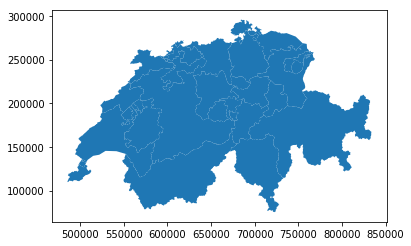

In [3]:
gdf_kantone.plot()

In [5]:
df_bergbahnen = pd.read_excel('dataprojects/Projections/data/bergbahnen3D.xlsx')

In [10]:
df_bergbahnen.head(2)

,OBJEKTART,NAME,MIN_E,MIN_N,MIN_Z,MAX_E,MAX_N,MAX_Z
0,Skilift,Grenzlift,621759,85777,3713,622992,85864,3902
1,Skilift,Plateau Breithorn,622730,86797,3800,622992,85867,3902


In [37]:
df_bergbahnen['OBJEKTART'].value_counts()

Skilift         841
Sesselbahn      365
Luftseilbahn    327
Gondelbahn      124
Name: OBJEKTART, dtype: int64

## Geometrien 1

### Punkt

In [17]:
x = 5
y = -7

In [19]:
punkt = Point(x, y)

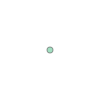

In [20]:
punkt

### in Pandas

In [21]:
def make_point(row):
    x = row['MIN_E']
    Y = row['MIN_N']
    return Point(x, y)

In [22]:
df_bergbahnen.apply(make_point, axis=1)

0       POINT (621759 -7)
1       POINT (622730 -7)
2       POINT (621991 -7)
3       POINT (621542 -7)
4       POINT (621517 -7)
5       POINT (635480 -7)
6       POINT (635509 -7)
7       POINT (621494 -7)
8       POINT (618779 -7)
9       POINT (621184 -7)
10      POINT (642130 -7)
11      POINT (628987 -7)
12      POINT (635482 -7)
13      POINT (621939 -7)
14      POINT (619879 -7)
15      POINT (589429 -7)
16      POINT (783301 -7)
17      POINT (627027 -7)
18      POINT (628865 -7)
19      POINT (628634 -7)
20      POINT (621984 -7)
21      POINT (635286 -7)
22      POINT (640622 -7)
23      POINT (704665 -7)
24      POINT (641390 -7)
25      POINT (626887 -7)
26      POINT (627720 -7)
27      POINT (624520 -7)
28      POINT (675497 -7)
29      POINT (674736 -7)
              ...        
1627    POINT (605706 -7)
1628    POINT (681760 -7)
1629    POINT (697803 -7)
1630    POINT (711863 -7)
1631    POINT (557405 -7)
1632    POINT (722219 -7)
1633    POINT (690699 -7)
1634    POIN

Oder in Kurzform

In [23]:
df_bergbahnen['Punkt1'] = df_bergbahnen.apply(lambda row: Point(row['MIN_E'], row['MIN_N']), axis=1)

In [24]:
df_bergbahnen.head(2)

,OBJEKTART,NAME,MIN_E,MIN_N,MIN_Z,MAX_E,MAX_N,MAX_Z,Punkt1
0,Skilift,Grenzlift,621759,85777,3713,622992,85864,3902,POINT (621759 85777)
1,Skilift,Plateau Breithorn,622730,86797,3800,622992,85867,3902,POINT (622730 86797)


In [28]:
df_bergbahnen['Punkt1'].plot()

TypeError: Empty 'DataFrame': no numeric data to plot

### Geopandas

In [29]:
gdf_bergbahnen = gpd.GeoDataFrame(df_bergbahnen, geometry='Punkt1')

In [30]:
gdf_bergbahnen.head(2)

,OBJEKTART,NAME,MIN_E,MIN_N,MIN_Z,MAX_E,MAX_N,MAX_Z,Punkt1
0,Skilift,Grenzlift,621759,85777,3713,622992,85864,3902,POINT (621759 85777)
1,Skilift,Plateau Breithorn,622730,86797,3800,622992,85867,3902,POINT (622730 86797)


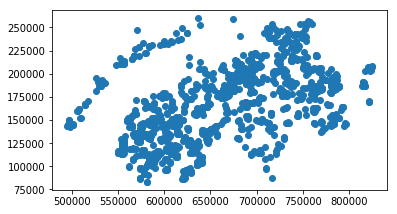

In [31]:
gdf_bergbahnen.plot()

In [62]:
gdf_bergbahnen.geometry

0         LINESTRING (621759 85777, 622992 85864)
1         LINESTRING (622730 86797, 622992 85867)
2         LINESTRING (621991 91079, 622561 87549)
3         LINESTRING (621542 87239, 621973 85824)
4         LINESTRING (621517 87222, 621903 85823)
5       LINESTRING (635480 100882, 635559 100090)
6       LINESTRING (635509 100873, 635567 100091)
7         LINESTRING (621494 87233, 621656 86612)
8         LINESTRING (618779 86517, 620865 87025)
9         LINESTRING (621184 88240, 620925 86925)
10      LINESTRING (642130 155229, 642204 155320)
11        LINESTRING (628987 93322, 629781 92863)
12      LINESTRING (635482 101412, 635931 100871)
13        LINESTRING (621939 91007, 620612 88847)
14        LINESTRING (619879 88521, 620899 88189)
15      LINESTRING (589429 103726, 590692 103181)
16      LINESTRING (783301 145084, 783162 143536)
17        LINESTRING (627027 95334, 628164 93115)
18        LINESTRING (628865 92876, 628191 93082)
19        LINESTRING (628634 94280, 628852 92872)


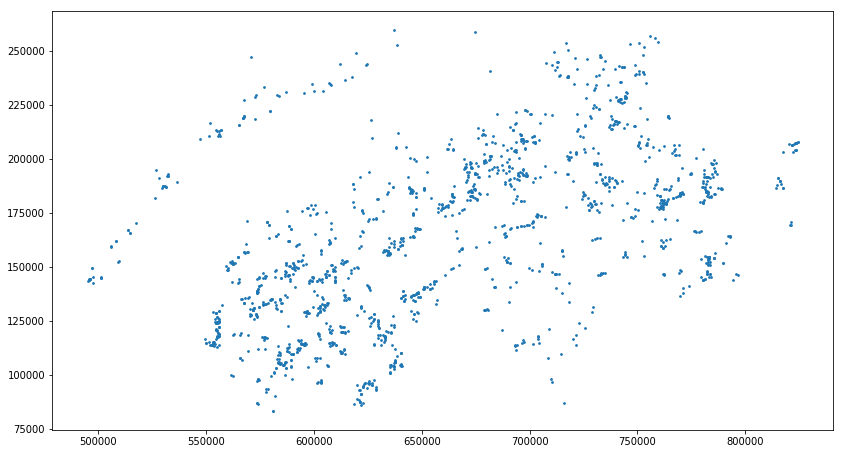

In [35]:
gdf_bergbahnen.plot(figsize=(14,10), markersize=3)

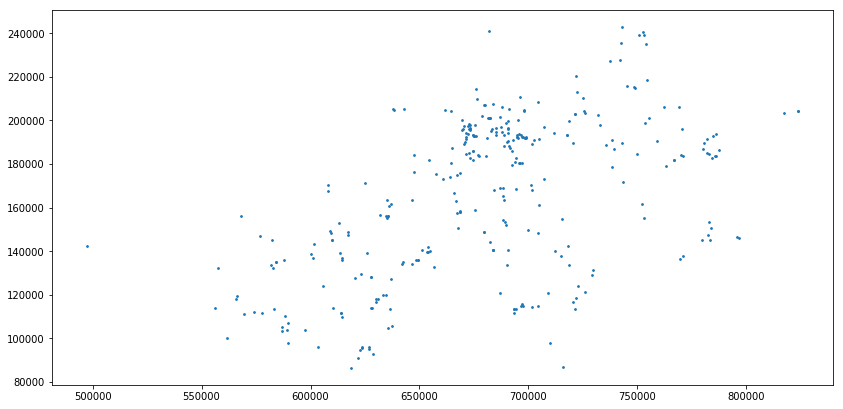

In [39]:
gdf_bergbahnen[gdf_bergbahnen['OBJEKTART'] == 'Luftseilbahn'].plot(figsize=(14,10), markersize=3)

## Geometrien 2

### Linie

In [52]:
x1 = 8
y1 = -6

In [53]:
x2 = 4
y2 = 10

In [55]:
linie = LineString([Point(x1, y1), Point(x2, y2)])

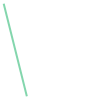

In [56]:
linie

### in Pandas

** Einen zweiten Punkt erstellen**

In [40]:
gdf_bergbahnen['Punkt2'] = gdf_bergbahnen.apply(lambda row: Point(row['MAX_E'], row['MAX_N']), axis=1)

In [41]:
gdf_bergbahnen.head(2)

,OBJEKTART,NAME,MIN_E,MIN_N,MIN_Z,MAX_E,MAX_N,MAX_Z,Punkt1,Punkt2
0,Skilift,Grenzlift,621759,85777,3713,622992,85864,3902,POINT (621759 85777),POINT (622992 85864)
1,Skilift,Plateau Breithorn,622730,86797,3800,622992,85867,3902,POINT (622730 86797),POINT (622992 85867)


**Eine Linie daraus machen**

In [44]:
gdf_bergbahnen['Linie'] = gdf_bergbahnen.apply(lambda row: LineString([row['Punkt1'], row['Punkt2']]), axis=1)

In [46]:
gdf_bergbahnen.head(2)

,OBJEKTART,NAME,MIN_E,MIN_N,MIN_Z,MAX_E,MAX_N,MAX_Z,Punkt1,Punkt2,Linie
0,Skilift,Grenzlift,621759,85777,3713,622992,85864,3902,POINT (621759 85777),POINT (622992 85864),"LINESTRING (621759 85777, 622992 85864)"
1,Skilift,Plateau Breithorn,622730,86797,3800,622992,85867,3902,POINT (622730 86797),POINT (622992 85867),"LINESTRING (622730 86797, 622992 85867)"


In [48]:
gdf_bergbahnen = gdf_bergbahnen.set_geometry('Linie')

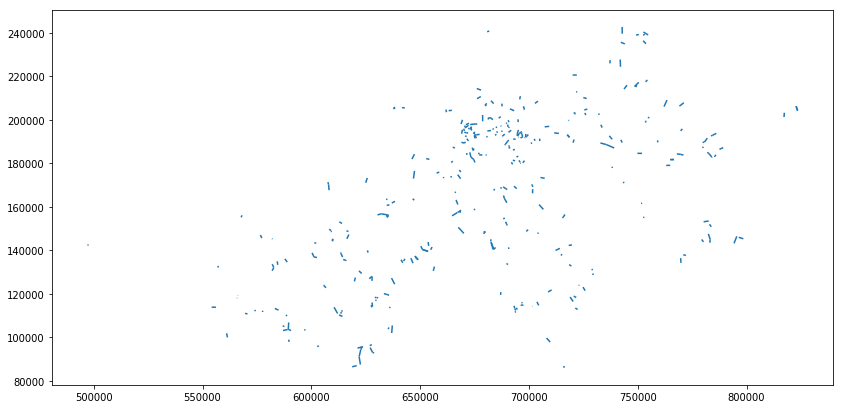

In [51]:
gdf_bergbahnen[gdf_bergbahnen['OBJEKTART'] == 'Luftseilbahn'].plot(figsize=(14,10), markersize=3)

In [63]:
gdf_bergbahnen.geometry

0         LINESTRING (621759 85777, 622992 85864)
1         LINESTRING (622730 86797, 622992 85867)
2         LINESTRING (621991 91079, 622561 87549)
3         LINESTRING (621542 87239, 621973 85824)
4         LINESTRING (621517 87222, 621903 85823)
5       LINESTRING (635480 100882, 635559 100090)
6       LINESTRING (635509 100873, 635567 100091)
7         LINESTRING (621494 87233, 621656 86612)
8         LINESTRING (618779 86517, 620865 87025)
9         LINESTRING (621184 88240, 620925 86925)
10      LINESTRING (642130 155229, 642204 155320)
11        LINESTRING (628987 93322, 629781 92863)
12      LINESTRING (635482 101412, 635931 100871)
13        LINESTRING (621939 91007, 620612 88847)
14        LINESTRING (619879 88521, 620899 88189)
15      LINESTRING (589429 103726, 590692 103181)
16      LINESTRING (783301 145084, 783162 143536)
17        LINESTRING (627027 95334, 628164 93115)
18        LINESTRING (628865 92876, 628191 93082)
19        LINESTRING (628634 94280, 628852 92872)


## Plotten

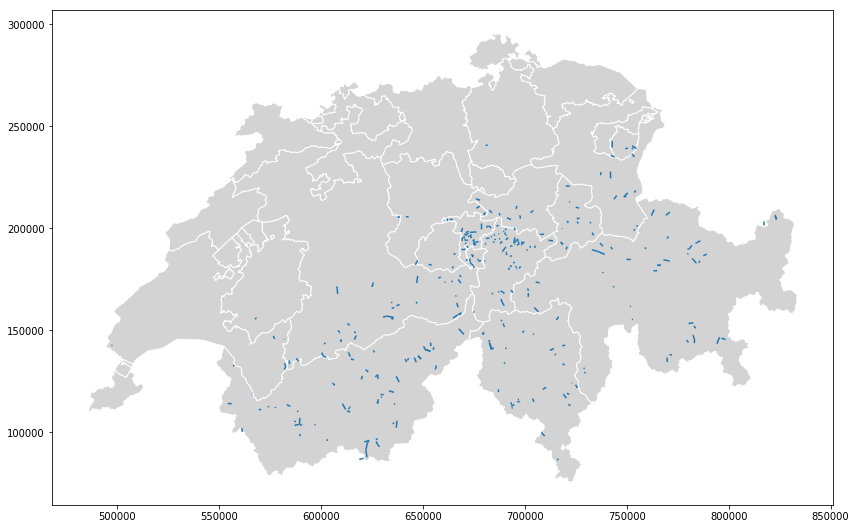

In [61]:
ax = gdf_kantone.plot(figsize=(14,10), color='lightgrey', edgecolor='white')
gdf_bergbahnen[gdf_bergbahnen['OBJEKTART'] == 'Luftseilbahn'].plot(figsize=(14,10), markersize=3, ax=ax)